# Lógica de programação

Curso Ciência de dados Udemy

Passos para a solução do desafio:

1.   Entender o desafio;
2.   Importar a base de dados;
3.   Calcular o produto mais vendido (em quantidade);
4.   Calcular o produto mais vendido (em faturamento);
5.   Calcular a loja/estado que mais vendeu (em faturamento);
6.   Calcular o ticket médio por loja/estado;
7.   Criar um grafico/dashboard da loja/estado que mais vendeu (em faturamento);
8.   Enviar um email.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import smtplib
import email.message
import plotly.express as px


In [ ]:
db = pd.read_excel("/content/drive/MyDrive/python dc/vendasbasededados.xlsx")
db

,Cód.,Data,Loja,Produto,Quantidade,Valor Unitário
0,1,5/18/2022,Maranhão,Caixa de som,4,79
1,2,7/24/2022,Santa Catarina,Notebook,9,3789
2,3,12/20/2022,Rio de Janeiro,Notebook,3,3789
3,4,1/22/2022,Espírito Santo,Nobreak,9,1279
4,5,9/11/2022,Tocantins,Impressora,9,699
...,...,...,...,...,...,...
14995,14996,8/18/2022,São Paulo,Webcam,4,150
14996,14997,1/6/2022,São Paulo,Impressora,9,699
14997,14998,11/13/2022,São Paulo,Notebook,9,3789
14998,14999,6/29/2022,São Paulo,Caixa de som,6,79


In [ ]:
#passo 3

tb_qtd_prod = db.groupby(['Produto']).sum()
tb_qtd_prod = tb_qtd_prod[['Quantidade']].sort_values('Quantidade', ascending=False)#com um colchete, funciona sem a visualização em tabela
tb_qtd_prod

,Quantidade
Produto,
Impressora,13285
Notebook,12930
Monitor,9923
Nobreak,6778
Tablet,6684
Teclado,6631
Webcam,6562
Caixa de som,6535
PC,6518


In [ ]:
#passo 4

db['Faturamento'] = db['Valor Unitário'] * db['Quantidade']
tb_fatur_prod = db.groupby(['Produto']).sum()
tb_fatur_prod = tb_fatur_prod[['Faturamento']].sort_values(by = 'Faturamento', ascending=False)#com um colchete, funciona sem a visualização em tabela
display(tb_fatur_prod)

,Faturamento
Produto,
Notebook,48991770
PC,38456200
Monitor,11907600
Impressora,9286215
Tablet,9016716
Nobreak,8669062
Teclado,1193580
Webcam,984300
Mouse,725872


In [ ]:
tb_fatur_lojas = db.groupby('Loja').sum()
tb_fatur_lojas = tb_fatur_lojas[['Faturamento', 'Quantidade']]#.sort_values('Faturamento', ascending=False)
display(tb_fatur_lojas)

In [ ]:
#passo 5 - Calcular a loja/estado que mais vendeu (em faturamento);
tb_fatur_lojas = db.groupby(['Loja']).sum()
tb_fatur_lojas = tb_fatur_lojas[['Faturamento', 'Quantidade']].sort_values('Faturamento', ascending=False)
display(tb_fatur_lojas)

,Faturamento,Quantidade
Loja,,
São Paulo,41018776,26091
Rio de Janeiro,12274351,7848
Minas Gerais,11491527,7701
Paraná,7611645,4844
Pernambuco,7041123,4266
Rio Grande do Sul,6618703,3890
Goiás,6288009,4019
Bahia,5030257,3204
Santa Catarina,4971700,2772


In [ ]:
# passo 6 - Calcular o ticket médio por loja/estado;

db['Ticket médio'] = db['Valor Unitário']
''' Solução alternativa
# Convert 'Valor Unitário' column to numeric type
db['Ticket médio'] = pd.to_numeric(db['Ticket médio'], errors='coerce')

# Calculate the average ticket value per store
tb_ticket_medio = db.groupby('Loja')['Ticket médio'].mean()
'''
tb_ticket_medio = db.groupby('Loja').mean(numeric_only=True)
tb_ticket_medio = tb_ticket_medio[['Ticket médio']].sort_values('Ticket médio', ascending=False)
display(tb_ticket_medio)

,Ticket médio
Loja,
Acre,2142.769231
Sergipe,1735.333333
Tocantins,1734.306452
Rio Grande do Sul,1690.043909
Pará,1683.746177
Santa Catarina,1683.562620
Pernambuco,1683.036849
Paraná,1608.725917
Bahia,1606.045226


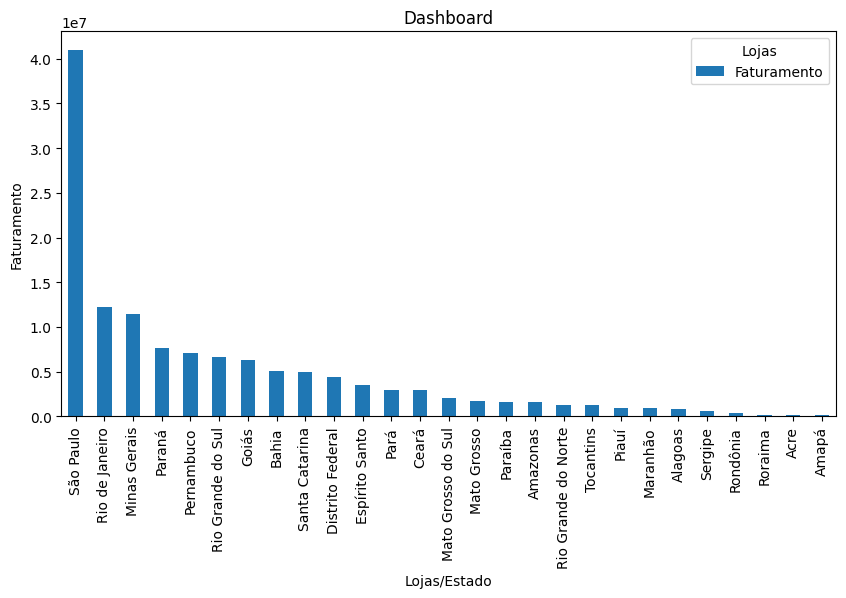

In [ ]:
# passo 7 - Criar um grafico/dashboard da loja/estado que mais vendeu (em faturamento);
#tentativa com matplotlib

# bar_labels = ['red', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']
ax = tb_fatur_lojas.plot.bar(figsize=(10,5))

ax.set_ylabel('Faturamento')
ax.set_xlabel('Lojas/Estado')
ax.set_title('Dashboard')
ax.legend(title='Lojas')

plt.show()

In [ ]:
# passo 7 - plotly

# Ao usar o método de agrupamento 'groupby', a coluna que foi passada para ser
# ordenada se torna o índice da tabela

grafico = px.bar(tb_fatur_lojas, y ='Faturamento', x=tb_fatur_lojas.index)
grafico.show()

# É possível dar destaque(zoom) dentro do gráfico ao clicar e arrastar, para voltar qualquer ação é só dar clique duplo

In [ ]:
grafico = px.line(tb_fatur_lojas, y ='Faturamento', x=tb_fatur_lojas.index)
grafico.show()

In [ ]:
grafico = px.funnel(tb_fatur_lojas, y ='Faturamento', x=tb_fatur_lojas.index)
grafico.show()

# Formatações numéricas e monetárias


Loja/estado que mais vendeu (em faturamento)

In [ ]:
from babel.numbers import format_currency

# Formatação Monetária

tb_fatur_lojas_format = pd.DataFrame(tb_fatur_lojas['Faturamento'].apply(lambda x: format_currency(x, 'BRL', locale='pt_BR')))
tb_fatur_lojas_format = tb_fatur_lojas_format.reset_index()

tb_fatur_lojas_format

Produtos mais vendidos (em quantidade)

In [ ]:
# Formatação Numérica

tb_qtd_prod_format = pd.DataFrame(tb_qtd_prod['Quantidade'].apply(lambda i: "{:,}".format(i).replace(',','.')))
tb_qtd_prod_format = tb_qtd_prod_format.reset_index()

tb_qtd_prod_format

Produtos mais vendidos (em faturamento)

In [ ]:
tb_fatur_prod_format = pd.DataFrame(tb_fatur_prod['Faturamento'].apply(lambda y: format_currency(y, 'BRL', locale='pt_BR')))
tb_fatur_prod_format = tb_fatur_prod_format.reset_index()

tb_fatur_prod_format

Ticket Médio por loja/estado

In [ ]:
tb_ticket_medio_format = pd.DataFrame(tb_ticket_medio['Ticket médio'].apply(lambda v: format_currency(v, 'BRL', locale='pt_BR')))
tb_ticket_medio_format = tb_ticket_medio_format.reset_index()

tb_ticket_medio_format

Formatação HTML das tabelas


In [ ]:
tb_fatur_lojas_format_html = tb_fatur_lojas_format.to_html(index = False,
                                                           justify = 'center',
                                                           border = 0).replace(
                                                               '<tbody>',
                                                               '<tbody style="text-align: center; color:#484848; background:#F7F7F7">'
                                                           )

tb_qtd_prod_format_html = tb_qtd_prod_format.to_html(index = False,
                                                     justify = 'center',
                                                     border = 0).replace(
                                                               '<tbody>',
                                                               '<tbody style="text-align: center; color:#484848; background:#F7F7F7">'
                                                           )

tb_fatur_prod_format_html = tb_fatur_prod_format.to_html(index = False,
                                                         justify = 'center',
                                                         border = 0).replace(
                                                               '<tbody>',
                                                               '<tbody style="text-align: center; color:#484848; background:#F7F7F7">'
                                                           )

tb_ticket_medio_format_html = tb_ticket_medio_format.to_html(index = False,
                                                             justify = 'center',
                                                             border = 0).replace(
                                                               '<tbody>',
                                                               '<tbody style="text-align: center; color:#484848; background:#F7F7F7">'
                                                           )

**Enviar Relatório de Indicadores de desempenho**

In [ ]:
# passo 8 - Enviar um email.

corpo_email = f"""
<p>Prezados, </p>
<p>Segue o relatório de vendas do mês.</p>

<p><b>Faturamento por loja:</b></p>
<p>{tb_fatur_lojas_format_html}</p>

<p><b>Quantidade vendida por produto:</b></p>
<p>{tb_qtd_prod_format_html}</p>

<p><b>Faturamento por produto:</b></p>
<p>{tb_fatur_prod_format_html}</p>

<p><b>Ticket médio por loja:</b></p>
<p>{tb_ticket_medio_format_html}</p>

<p>Qualquer dúvida estou à disposição</p>

<p>Att.</p>

<p>Otávio</p>
"""

#Configuração para envio
msg = email.message.Message()
msg['Subject'] = "Relatório de vendas" #ASSUNTO DO E-MAIL#
msg['From'] = 'otavio@gmail.com' #E-MAIL QUE VAI ENVIAR O E-MAIL#
#
msg['To'] = 'otavio1@gmail.com'#E-MAIL QUE VAI RECEBER
password = '' #SENHA DO E-MAIL QUE VAI ENVIAR
msg.add_header('Content-Type', 'text/html')
msg.set_payload(corpo_email)

s = smtplib.SMTP('smtp.gmail.com: 587')
s.starttls()
# Login Credentials for sending the mail
s.login(msg['From'], password)
s.sendmail(msg['From'], [msg['To']], msg.as_string().encode('utf-8'))
print('Email enviado')

Email enviado
